# Decision Tree Regresion
https://towardsdatascience.com/machine-learning-basics-decision-tree-regression-1d73ea003fda

In [1]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open('vec_dict1.pickle', 'rb') as h:
    vec = pickle.load(h)
with open('sca_dict1.pickle', 'rb') as h:
    sca = pickle.load(h)

In [72]:
check_nodes = 5
tar = 6
dfinfo = []
for i in range(check_nodes):
    bunStored = vec[i+1].loc[vec[i+1]['name'] == 'sdrBundlesDeleted:vector'] #i+1
    aux = tuple(map(float, bunStored['vecvalue'].to_list()[0].split()))
    dfinfo.append(aux)
    #cgrCalls = vec[i+1].loc[vec[i+1]['name'] == 'sdrBundleStored:vector']
    #aux = tuple(map(float, cgrCalls['vecvalue'].to_list()[0].split()))
    #dfinfo.append(aux)

In [4]:
dfinfo = []
tar = 6
node = 5
bunStored = vec[node].loc[vec[node]['name'] == 'sdrBundlesDeleted:vector']
aux = tuple(map(float, bunStored['vecvalue'].to_list()[0].split()))
dfinfo.append(aux)
#cgrCalls = vec[node].loc[vec[node]['name'] == 'sdrBundleStored:vector']
#aux = tuple(map(float, cgrCalls['vecvalue'].to_list()[0].split()))
#dfinfo.append(aux)

In [73]:
# Agregamos el nodo target
byStored = vec[tar].loc[vec[tar]['name'] == 'sdrBundleStored:vector']
aux = tuple(map(float, byStored['vecvalue'].to_list()[0].split()))
dfinfo.insert(0, aux)

In [74]:
src = list(zip(*dfinfo))
dataset = pd.DataFrame(src)#, columns = ['node5', 'node1','node2', 'node3', 'node4'])
dataset

,0,1,2,3,4,5
0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
318,1.0,149.0,99.0,72.0,81.0,36.0
319,0.0,150.0,99.0,72.0,81.0,36.0
320,1.0,151.0,99.0,72.0,81.0,36.0
321,0.0,152.0,99.0,72.0,81.0,36.0


<AxesSubplot:>

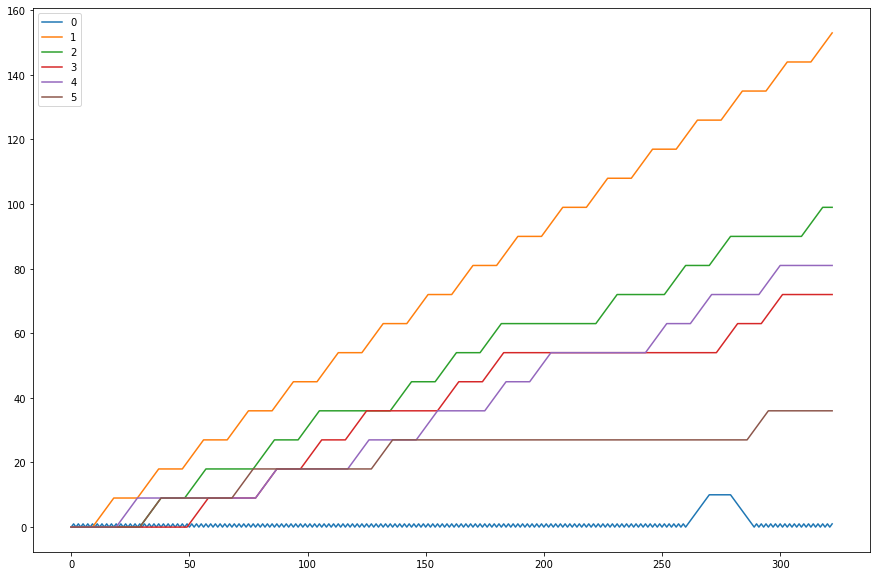

In [75]:
dataset.plot(figsize=(15,10))

In [76]:
X = dataset.iloc[:, 1:]
y = dataset.iloc[:, :1]

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [78]:
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [79]:
y_pred = regressor.predict(X_test)
y_pred

array([ 0.        ,  0.33333333,  0.        , 10.        ,  1.        ,
        0.        ,  0.        ,  0.6       ,  0.33333333,  0.        ,
        1.        ,  0.        ,  0.33333333,  0.42857143,  0.42857143,
        0.33333333,  1.        ,  1.        ,  1.        ,  1.        ,
        0.42857143,  0.33333333,  0.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  0.33333333,  0.5       ,  0.5       ,
        0.42857143,  0.        ,  1.        ,  0.66666667,  0.        ,
        7.        ,  0.        ,  1.        ,  1.        ,  0.66666667,
        0.        ,  1.        ,  1.        ,  0.33333333,  0.        ,
        1.        ,  1.        ,  0.6       ,  1.        ,  1.        ,
        0.        ,  8.        ,  0.33333333,  1.        ,  1.        ,
        0.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        0.        ,  0.5       ,  1.        ,  0.5       ,  0.42857143])

In [80]:
y_test = y_test.values.reshape(1,len(y_test))[0]

In [81]:
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
df

,Real Values,Predicted Values
0,1.0,0.000000
1,1.0,0.333333
2,1.0,0.000000
3,10.0,10.000000
4,0.0,1.000000
...,...,...
60,1.0,0.000000
61,1.0,0.500000
62,0.0,1.000000
63,0.0,0.500000


<AxesSubplot:>

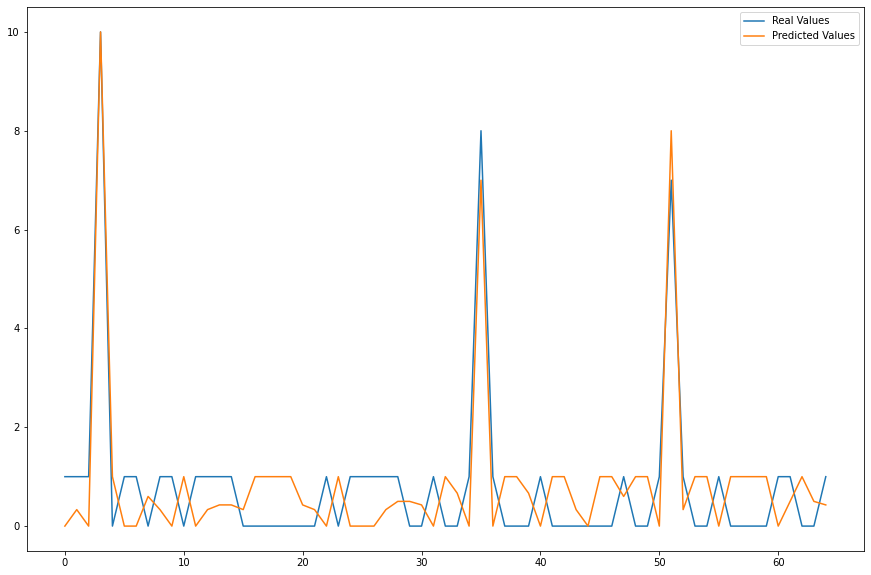

In [82]:
df.plot(figsize=(15,10))

In [83]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7557374059352013

# Visualising the Decision Tree Regression Results 
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_test, y_test, color = 'red')
plt.scatter(X_test, y_pred, color = 'green')
plt.title('Decision Tree Regression')
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.show()

plt.plot(X_grid, regressor.predict(X_grid), color = 'black')
plt.title('Decision Tree Regression')
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.show()

In [46]:
print(y_test.shape)
print(y_pred.shape)

(65,)
(65,)


In [47]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("RMSE:", np.sqrt(mse))

RMSE: 0.3721042037676254
